### Data extraction

In [3]:
!pip install --quiet neo4j matplotlib pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neo4j import GraphDatabase

In [5]:
neo4j_driver = GraphDatabase.driver(
    "neo4j://127.0.0.1:7687", auth=("neo4j", "password"))

In [6]:
session = neo4j_driver.session()

In [29]:
nodes = session.run(
    "MATCH (athlete:Athlete)-[:TRACKS]->(activity:Activity)-[:HAS_DATA_IN]->(activity_measurement:ActivityMeasurement)" \
    "RETURN ID(activity) as activity_id, athlete, activity_measurement"
)
results = [record for record in nodes.data()]

In [42]:
merged_results = [
    { "username": r['athlete']['name'], "activity_id": r["activity_id"], **r['activity_measurement'] }
    for r in results
]

In [43]:
df = pd.DataFrame(merged_results)

In [44]:
df

,username,activity_id,elevation,latitude,ISOString,speed,longitude
0,john86,566342,74.900000,54.120664,2023-10-30T15:17:43.000+00:00,27.612189,11.655172
1,john86,566342,48.666667,54.097767,2023-10-30T14:59:48.000+00:00,32.173811,11.633946
2,john86,566342,76.133333,54.119524,2023-10-30T15:18:19.000+00:00,26.093201,11.658840
3,john86,566342,42.841401,54.105186,2023-10-30T15:07:52.000+00:00,0.228123,11.608518
4,john86,566342,69.300000,54.122682,2023-10-30T15:16:36.000+00:00,24.903897,11.648678
...,...,...,...,...,...,...,...
1117083,GEOtemala,68899,1572.242750,14.649362,2023-11-11T14:05:06.000+00:00,0.499121,-91.229638
1117084,GEOtemala,68899,1572.613487,14.649369,2023-11-11T14:05:26.000+00:00,2.778248,-91.229638
1117085,GEOtemala,68899,1572.860010,14.649363,2023-11-11T14:05:03.000+00:00,0.189201,-91.229637
1117086,GEOtemala,68899,1574.155805,14.649346,2023-11-11T14:04:41.000+00:00,0.847098,-91.229616


In [69]:
unwrapped_df = df.groupby(by=["username", "activity_id"]).agg(list).reset_index()

In [84]:
unwrapped_df.head(n=3)

,username,activity_id,elevation,latitude,ISOString,speed,longitude,mean_speed
0,APneunzehn74,47366,"[316.85, 318.8, 316.6166666666667, 322.7666666...","[48.8269858, 48.82703, 48.825863616666666, 48....","[2023-11-14T15:35:49.000+00:00, 2023-11-14T15:...","[3.6373767435348388, 4.688001739717897, 4.9855...","[12.909876650000001, 12.910045, 12.91423138333...",4.058226
1,APneunzehn74,47561,"[337.55, 343.31666666666666, 339.8, 344.483333...","[48.82525165, 48.82525388333333, 48.8251933, 4...","[2023-11-14T15:25:43.000+00:00, 2023-11-14T15:...","[1.8422706583239148, 0.6823143582615726, 5.554...","[12.914481649999999, 12.91440025, 12.9145, 12....",2.363112
2,APneunzehn74,47677,"[357.06666666666666, 353.2, 337.01666666666665...","[48.82512113333333, 48.825184433333334, 48.825...","[2023-11-14T15:20:46.000+00:00, 2023-11-14T15:...","[4.398527321014304, 4.899491212164095, 1.90244...","[12.914077766666667, 12.914048900000001, 12.91...",3.733561


In [85]:
unwrapped_df['mean_speed'] = unwrapped_df['speed'].apply(np.nanmean)

In [86]:
unwrapped_df.head(n=3)

,username,activity_id,elevation,latitude,ISOString,speed,longitude,mean_speed
0,APneunzehn74,47366,"[316.85, 318.8, 316.6166666666667, 322.7666666...","[48.8269858, 48.82703, 48.825863616666666, 48....","[2023-11-14T15:35:49.000+00:00, 2023-11-14T15:...","[3.6373767435348388, 4.688001739717897, 4.9855...","[12.909876650000001, 12.910045, 12.91423138333...",4.058226
1,APneunzehn74,47561,"[337.55, 343.31666666666666, 339.8, 344.483333...","[48.82525165, 48.82525388333333, 48.8251933, 4...","[2023-11-14T15:25:43.000+00:00, 2023-11-14T15:...","[1.8422706583239148, 0.6823143582615726, 5.554...","[12.914481649999999, 12.91440025, 12.9145, 12....",2.363112
2,APneunzehn74,47677,"[357.06666666666666, 353.2, 337.01666666666665...","[48.82512113333333, 48.825184433333334, 48.825...","[2023-11-14T15:20:46.000+00:00, 2023-11-14T15:...","[4.398527321014304, 4.899491212164095, 1.90244...","[12.914077766666667, 12.914048900000001, 12.91...",3.733561


### Labeling

In [89]:
!pip install --quiet scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip


In [137]:
from sklearn.cluster import KMeans

In [112]:
MIN_K_MEAN = 1
MAX_K_MEAN = 20

In [166]:
X = unwrapped_df[['mean_speed']]

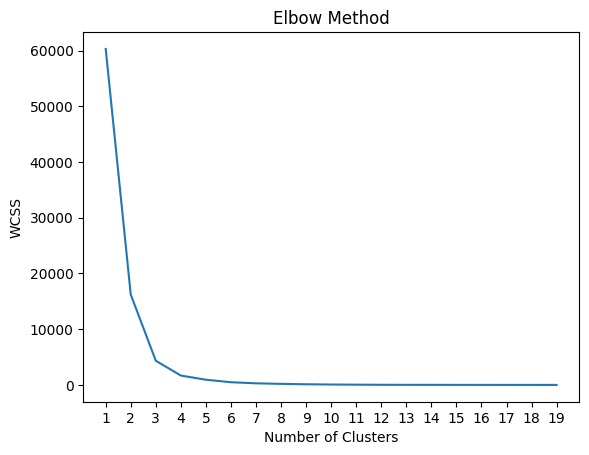

In [167]:
wcss = []
for k in range(MIN_K_MEAN, MAX_K_MEAN):
    km = KMeans(n_clusters =k, init="k-means++", max_iter=300, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(MIN_K_MEAN, MAX_K_MEAN), wcss);
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(MIN_K_MEAN, MAX_K_MEAN, 1))
plt.show()

In [214]:
CHOSEN_K_MEAN = 4

km = KMeans(n_clusters=CHOSEN_K_MEAN, init="k-means++", max_iter=1000, n_init=10)
label = km.fit_predict(X)

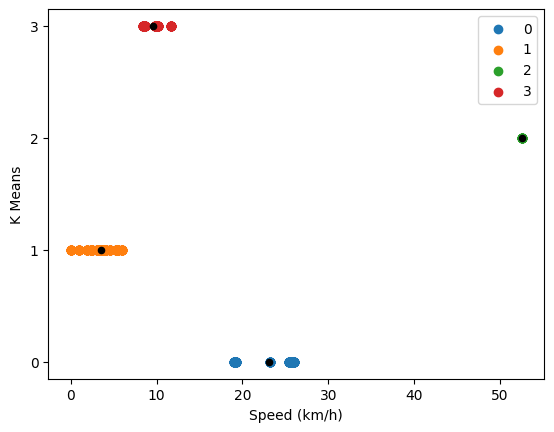

In [246]:
# Getting unique labels and centroids
 
u_labels = np.unique(label)
centroids = km.cluster_centers_

# Plotting the results:
 
for i in u_labels:
    X_i = X[label == i]
    plt.scatter(X_i, [i] * len(X_i), label = i)
plt.scatter(centroids, u_labels, s = 20, color = 'black')
plt.legend()
plt.xlabel('Speed (km/h)')
plt.ylabel('K Means')
plt.yticks(np.arange(0, CHOSEN_K_MEAN, 1))
plt.show()

In [218]:
unwrapped_df['type'] = label

In [219]:
unwrapped_df.head(n=3)

,username,activity_id,elevation,latitude,ISOString,speed,longitude,mean_speed,type
0,APneunzehn74,47366,"[316.85, 318.8, 316.6166666666667, 322.7666666...","[48.8269858, 48.82703, 48.825863616666666, 48....","[2023-11-14T15:35:49.000+00:00, 2023-11-14T15:...","[3.6373767435348388, 4.688001739717897, 4.9855...","[12.909876650000001, 12.910045, 12.91423138333...",4.058226,1
1,APneunzehn74,47561,"[337.55, 343.31666666666666, 339.8, 344.483333...","[48.82525165, 48.82525388333333, 48.8251933, 4...","[2023-11-14T15:25:43.000+00:00, 2023-11-14T15:...","[1.8422706583239148, 0.6823143582615726, 5.554...","[12.914481649999999, 12.91440025, 12.9145, 12....",2.363112,1
2,APneunzehn74,47677,"[357.06666666666666, 353.2, 337.01666666666665...","[48.82512113333333, 48.825184433333334, 48.825...","[2023-11-14T15:20:46.000+00:00, 2023-11-14T15:...","[4.398527321014304, 4.899491212164095, 1.90244...","[12.914077766666667, 12.914048900000001, 12.91...",3.733561,1


### Rule extraction

In [231]:
from sklearn.tree import DecisionTreeClassifier, export_text

In [232]:
X_train = unwrapped_df[['mean_speed']]
y_train = unwrapped_df['type']

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [233]:
tree_rules = export_text(dt, feature_names=list(X_train.columns))

In [234]:
print(tree_rules)

|--- mean_speed <= 7.20
|   |--- class: 1
|--- mean_speed >  7.20
|   |--- mean_speed <= 15.31
|   |   |--- class: 3
|   |--- mean_speed >  15.31
|   |   |--- mean_speed <= 39.26
|   |   |   |--- class: 0
|   |   |--- mean_speed >  39.26
|   |   |   |--- class: 2



### Testing

Hypothesis:

Class 0: Cycling

*Based on Google*: As the data shows, for the year 2018, the average cycling speed taken from the data of 287.5M rides, including a range of bike types and cycling disciplines, was 13.5 mph which equates to 21.72 km/h.

Class 1: Walking

*Based on Google*: According to the Centers for Disease Control and Prevention (CDC), the average walking speed for adults is between 4.02-6.44 km/h. 

Class 2: Transport

*Based on Google*: It can range from 20 to 30 miles per hour (32 to 48 km/h). On highways or open roads, cars can typically travel at higher speeds. The average speed on highways is often around 55 to 75 miles per hour (88 to 120 km/h), depending on the speed limits and traffic conditions.

Class 3: Running

*Based on Google*: The average running speed for men is about 6.6 mph or 10.62 km/h. For women, the average human running speed is 5.7 mph or 9.17 km/h

In [237]:
from sklearn.metrics import accuracy_score

In [239]:
X_walking_test = np.array([[4.02], [6.44]])
y_walking_test = np.array([1, 1])

y_walking_pred = dt.predict(X_walking_test)

print(f"Accuracy score (walking): {accuracy_score(y_walking_test, y_walking_pred) * 100}%")

Accuracy score (walking): 100.0%


/Users/danorel/.pyenv/versions/3.11.3/envs/sport-application-scrapping_3.11.3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [240]:
X_cycling_test = np.array([[21.72]])
y_cycling_test = np.array([0])

y_cycling_pred = dt.predict(X_cycling_test)

print(f"Accuracy score (cycling): {accuracy_score(y_cycling_test, y_cycling_pred) * 100}%")

Accuracy score (cycling): 100.0%


/Users/danorel/.pyenv/versions/3.11.3/envs/sport-application-scrapping_3.11.3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [247]:
X_running_test = np.array([[9.17], [10.62]])
y_running_test = np.array([3, 3])

y_running_pred = dt.predict(X_running_test)

print(f"Accuracy score (running): {accuracy_score(y_running_test, y_running_pred) * 100}%")

Accuracy score (running): 100.0%


/Users/danorel/.pyenv/versions/3.11.3/envs/sport-application-scrapping_3.11.3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [249]:
X_transport_test = np.array([[48.0], [120.0]])
y_transport_test = np.array([2, 2])

y_transport_pred = dt.predict(X_transport_test)

print(f"Accuracy score (running): {accuracy_score(y_transport_test, y_transport_pred) * 100}%")

Accuracy score (running): 100.0%


/Users/danorel/.pyenv/versions/3.11.3/envs/sport-application-scrapping_3.11.3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
